In [41]:
import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
# !pip install statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
import sklearn
import autosklearn.regression

def scale_min_max(data, x):
    # print(data)
    # print(x)
    return (x - data.min())/(data.max() - data.min())

def scale_Z(data, x):
    # print(data)
    # print(x)
    return (x - data.mean())/(data.std())


In [2]:
# !pip install auto-sklearn
# !pip install --upgrade scikit-learn

In [63]:
df = pd.read_pickle("data/test_pd.obj")
# df

In [64]:
lcs_df = pd.DataFrame(dict(df["lcs"])).T
rename = {i: f"q{i//3}ax{i%3}" for i in range(30)}
lcs_df.rename(columns=rename, inplace=True)

uptri_df = pd.DataFrame(dict(df["uptriDM"])).T

test = uptri_df.join(lcs_df)

test


,0,1,2,3,4,5,6,7,8,9,...,q6ax2,q7ax0,q7ax1,q7ax2,q8ax0,q8ax1,q8ax2,q9ax0,q9ax1,q9ax2
1001,0.056858,0.0,0.689989,0.523200,0.627354,0.418212,0.164532,0.104988,0.093696,0.583685,...,0.033931,0.107271,-0.039271,0.219718,-0.056209,-0.025898,0.090251,-0.201794,0.065554,0.155582
1000,0.059163,0.0,0.629436,0.556109,0.651140,0.405136,0.127678,0.150973,0.148086,0.738199,...,0.041479,0.132738,-0.060602,0.254336,-0.074117,-0.036144,0.092335,-0.144860,0.095916,0.103331
1004,0.086339,0.0,0.721862,0.537112,0.738398,0.445498,0.172635,0.091614,0.189466,0.687639,...,0.030005,0.147494,-0.023780,0.244659,-0.086410,-0.042762,0.113464,-0.198389,0.101305,0.113052
1005,0.077935,0.0,0.533889,0.562519,0.561333,0.403109,0.114980,0.159409,0.061717,0.907845,...,-0.049313,0.074929,-0.031863,0.179194,-0.079814,0.000328,0.189262,-0.221348,0.068314,0.178818
1006,0.115590,0.0,0.724546,0.734137,0.565613,0.450592,0.174569,0.187792,0.115021,0.615093,...,-0.070589,0.064245,-0.057118,0.179867,-0.097333,0.014656,0.232062,-0.192758,0.075463,0.158941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,0.093872,0.0,0.754172,0.561553,0.758285,0.461409,0.186205,0.097596,0.192866,0.679825,...,-0.005713,0.121001,-0.054566,0.199001,-0.087895,-0.034550,0.158822,-0.180720,0.091742,0.143568
915,0.058846,0.0,0.560013,0.729187,0.729491,0.457149,0.098944,0.180977,0.177359,1.000000,...,0.005422,0.027666,-0.058763,0.111007,-0.022551,-0.040788,0.100044,-0.271551,0.044596,0.266425
916,0.115247,0.0,0.652092,0.597712,0.559296,0.418526,0.134557,0.179186,0.048117,0.477529,...,-0.057284,0.121675,-0.007894,0.254338,-0.057900,-0.048065,0.111771,-0.239314,0.078817,0.207085
917,0.065892,0.0,0.552763,0.577092,0.635162,0.400543,0.152219,0.063962,0.130790,1.000000,...,-0.015011,0.095304,-0.120162,0.149029,-0.109518,-0.036317,0.139773,-0.178764,0.051981,0.215331


<AxesSubplot:>

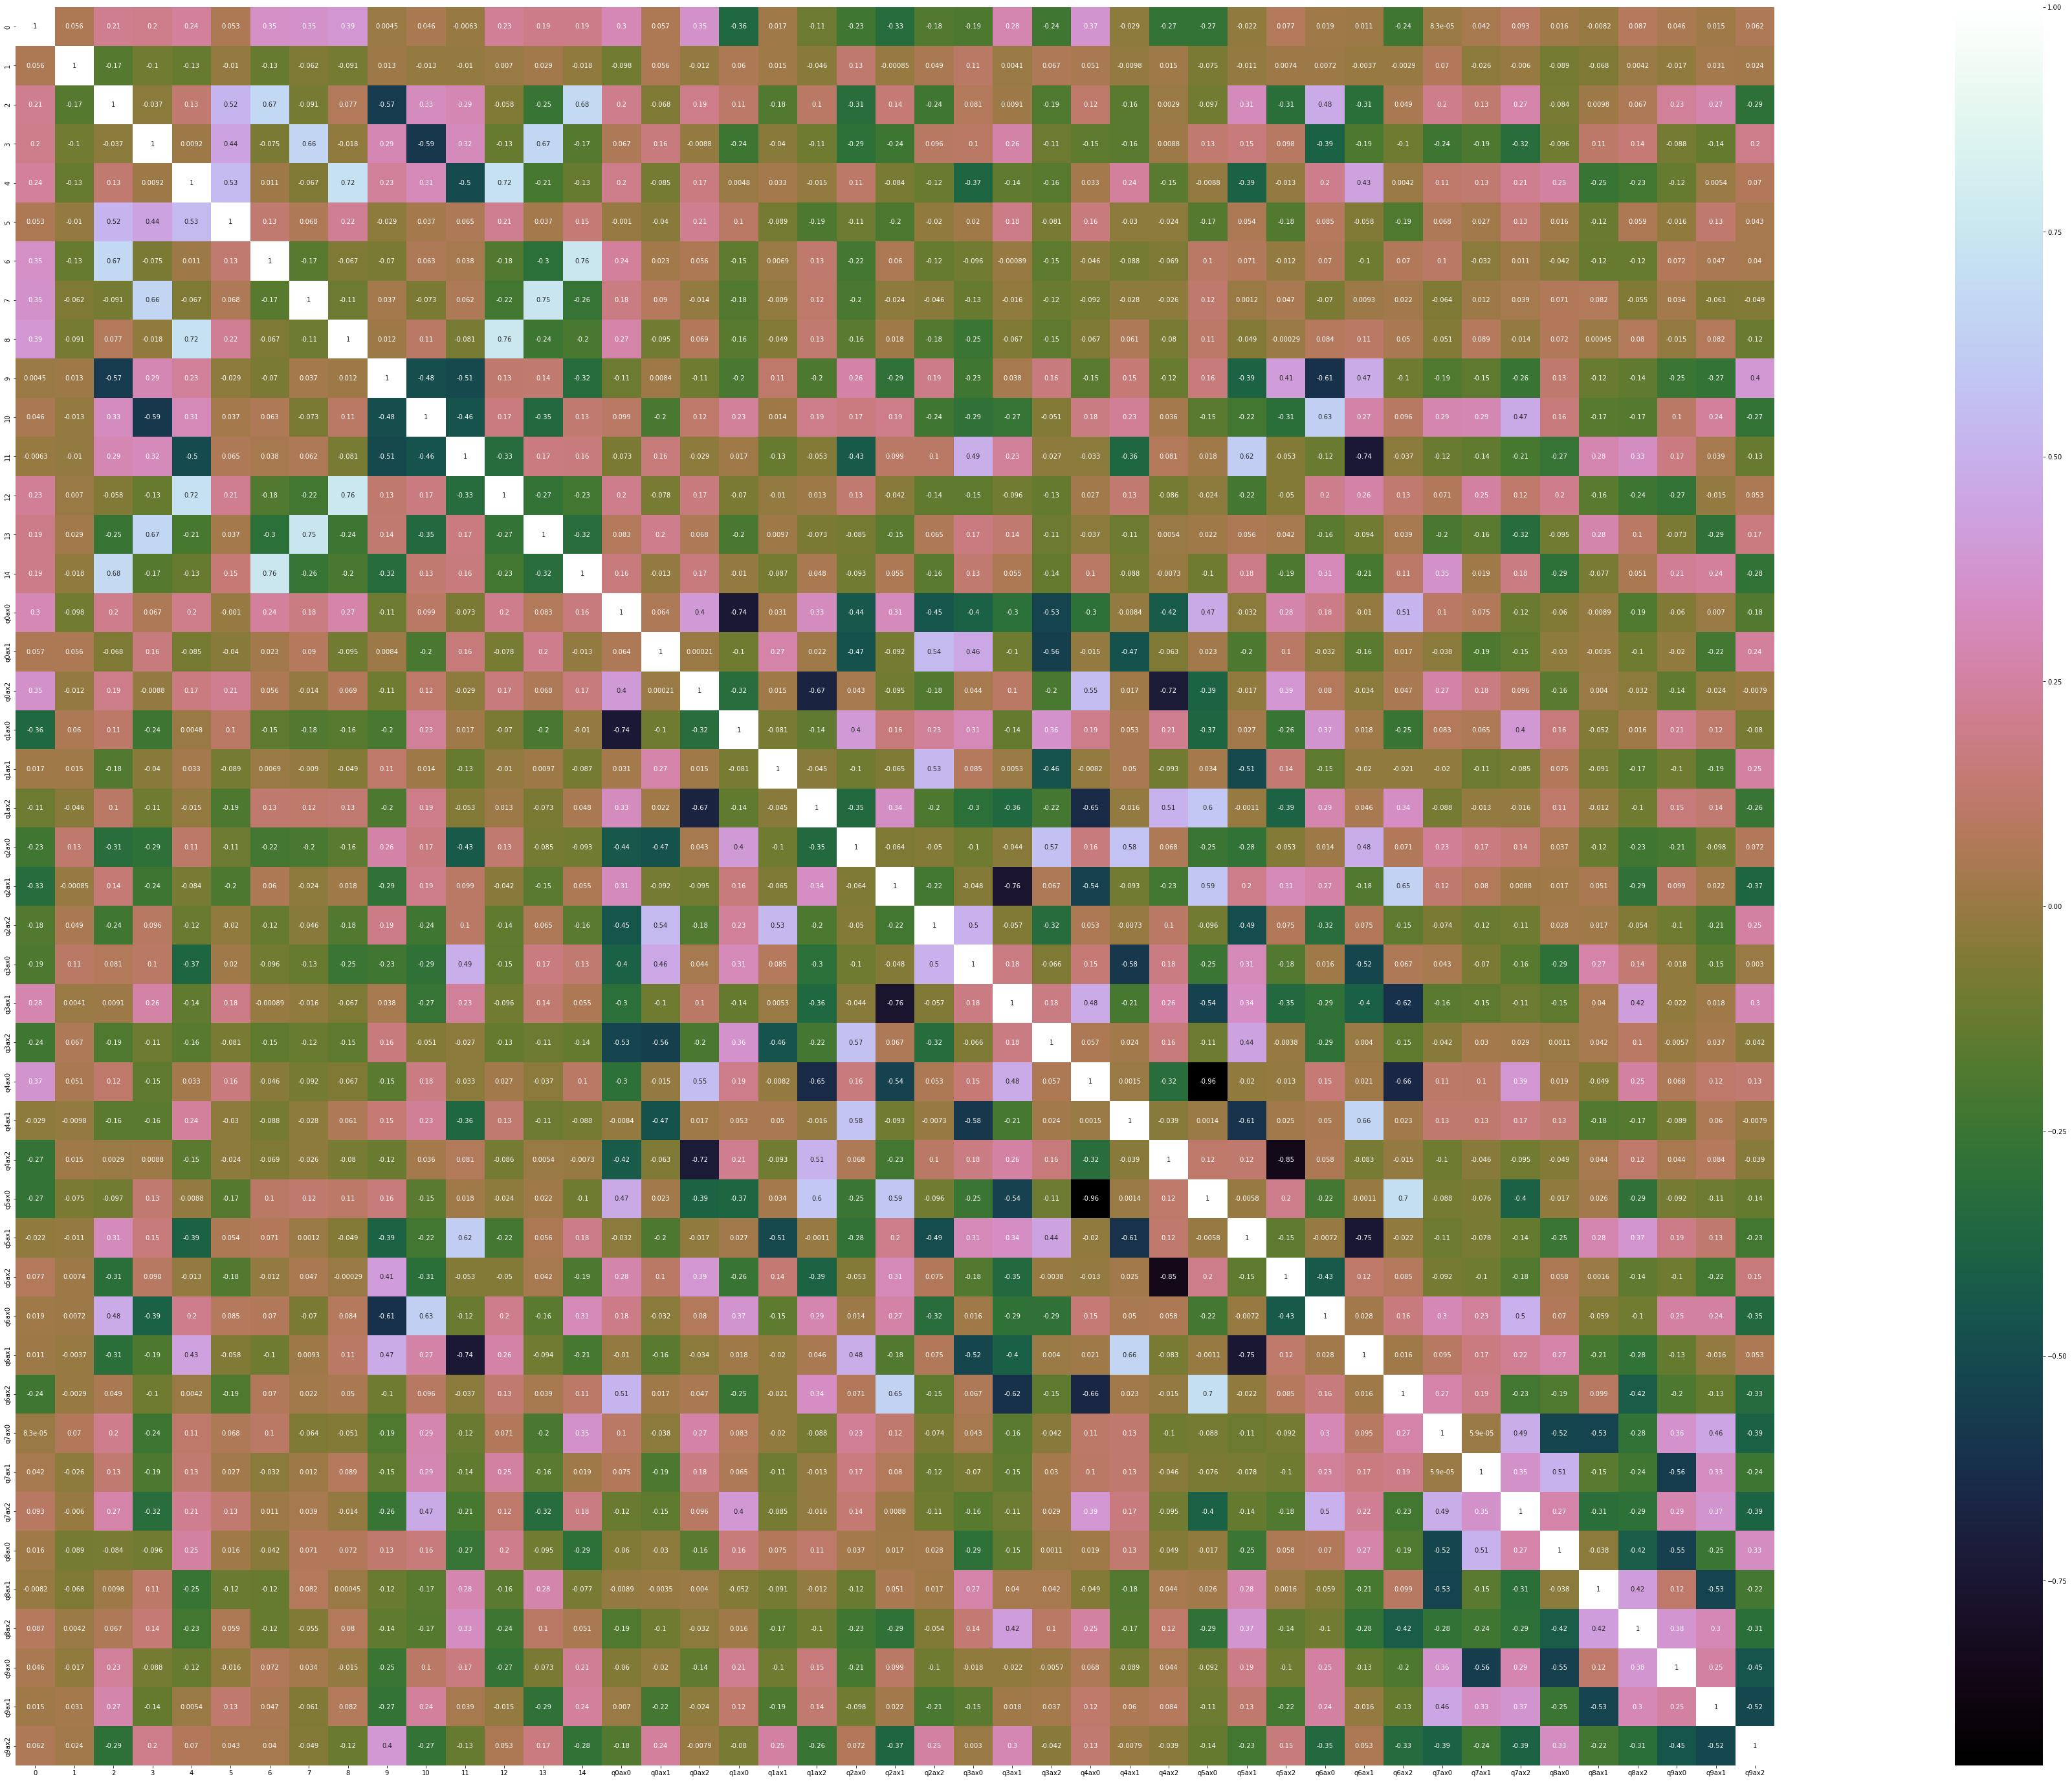

In [65]:
corr_mat=test.corr(method='pearson')
plt.figure(figsize=(100,50))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [66]:
X = uptri_df
y = lcs_df["q1ax0"]
y = scale_min_max(y,y)
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1)

In [67]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    ensemble_size=1,
    tmp_folder='/home/unibas/boittier/fdcm_python/tmp',
)

In [68]:
automl.fit(X_train, y_train)

AutoSklearnRegressor(ensemble_size=1, per_run_time_limit=30,
                     time_left_for_this_task=120,
                     tmp_folder='/home/unibas/boittier/fdcm_python/tmp')

In [69]:
print(automl.leaderboard())

          rank  ensemble_weight              type      cost   duration
model_id                                                              
9            1              1.0  gaussian_process  0.427637  10.866539


In [70]:
print(automl.show_models())

{9: {'model_id': 9, 'rank': 1, 'cost': 0.4276368620487401, 'ensemble_weight': 1.0, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x2b2e2314fe50>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x2b2e236e7e80>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x2b2e236e7c10>, 'sklearn_regressor': GaussianProcessRegressor(alpha=0.42928092501196696,
                         kernel=RBF(length_scale=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
                         n_restarts_optimizer=10, normalize_y=True,
                         random_state=1)}}


In [71]:
print(automl.show_models()[9]["data_preprocessor"].__dict__)

{'random_state': 1, 'choice': FeatTypeSplit(column_transformer=ColumnTransformer(sparse_threshold=0.0,
                                                   transformers=[('numerical_transformer',
                                                                  NumericalPreprocessingPipeline(config=Configuration(values={
  'imputation:strategy': 'mean',
  'rescaling:__choice__': 'quantile_transformer',
  'rescaling:quantile_transformer:n_quantiles': 268,
  'rescaling:quantile_transformer:output_distribution': 'u...
                      'numerical_transformer:rescaling:quantile_transformer:n_quantiles': 268,
                      'numerical_transformer:rescaling:quantile_transformer:output_distribution': 'uniform'},
              feat_type={0: 'numerical', 1: 'numerical', 2: 'numerical',
                         3: 'numerical', 4: 'numerical', 5: 'numerical',
                         6: 'numerical', 7: 'numerical', 8: 'numerical',
                         9: 'numerical', 10: 'numerical',

In [72]:
print(automl.show_models()[9]["feature_preprocessor"].__dict__)

{'random_state': 1, 'choice': FeatureAgglomeration(affinity='euclidean', linkage='average', n_clusters=107,
                     pooling_func=<function median at 0x2b2e005a1040>,
                     random_state=1), 'new_params': {'affinity': 'euclidean', 'linkage': 'average', 'n_clusters': 107, 'pooling_func': 'median', 'random_state': 1}, 'fitted_': True}


Train R2 score: 0.6770329203158916
Test R2 score: 0.5571798440877971


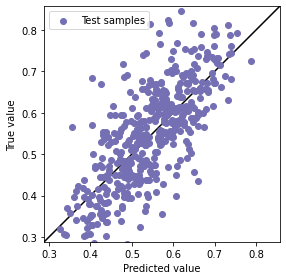

In [73]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

# plt.scatter(train_predictions, y_train, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, y_test, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()

xmin = min(train_predictions)
xmax = max(train_predictions)

plt.plot([xmin, xmax], [xmin, xmax], c='k', zorder=0)
plt.xlim([xmin, xmax])
plt.ylim([xmin, xmax])

plt.tight_layout()
plt.gca().set_aspect('equal')
plt.show()